In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier

C:\Users\umabk\Anaconda2\envs\myenv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_df=pd.read_csv("application_train.csv")
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


* find the columns with missing values and remove the ones that don't make sense
* outliers and noise in data
* histogram and label plot
* dummy variable creation

* EDA:
    * Univariate
    * Bivariate
    * Correlation

* Feature Importance
* Feature Elimination
* Model evaluation

In [4]:
# the size of the dataframe

print("The dataframe shape is :",train_df.shape)

The dataframe shape is : (307511, 122)


In [5]:
# the columns and of int type and summary

print("Of the 122 The no. of numeric columns",len(train_df.select_dtypes(include=['int64','float64']).columns))
train_df.select_dtypes(include=['int64']).describe()

Of the 122 The no. of numeric columns 106


,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,0.199368,0.998133,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.722121,4363.988632,141275.766519,1509.450419,0.001803,0.384280,0.399526,0.043164,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print("Of the 122 The no. of categorical columns",len(train_df.select_dtypes(include=['object']).columns))
train_df.select_dtypes(include=['object']).describe()

Of the 122 The no. of categorical columns 16


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [7]:
cols=train_df.columns.tolist()
bi=[]
for i in cols:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq==2:
        print(i,train_df[i].unique().tolist())
        bi.append(i)

TARGET [1, 0]
NAME_CONTRACT_TYPE ['Cash loans', 'Revolving loans']
FLAG_OWN_CAR ['N', 'Y']
FLAG_OWN_REALTY ['Y', 'N']
FLAG_MOBIL [1, 0]
FLAG_EMP_PHONE [1, 0]
FLAG_WORK_PHONE [0, 1]
FLAG_CONT_MOBILE [1, 0]
FLAG_PHONE [1, 0]
FLAG_EMAIL [0, 1]
REG_REGION_NOT_LIVE_REGION [0, 1]
REG_REGION_NOT_WORK_REGION [0, 1]
LIVE_REGION_NOT_WORK_REGION [0, 1]
REG_CITY_NOT_LIVE_CITY [0, 1]
REG_CITY_NOT_WORK_CITY [0, 1]
LIVE_CITY_NOT_WORK_CITY [0, 1]
FLAG_DOCUMENT_2 [0, 1]
FLAG_DOCUMENT_3 [1, 0]
FLAG_DOCUMENT_4 [0, 1]
FLAG_DOCUMENT_5 [0, 1]
FLAG_DOCUMENT_6 [0, 1]
FLAG_DOCUMENT_7 [0, 1]
FLAG_DOCUMENT_8 [0, 1]
FLAG_DOCUMENT_9 [0, 1]
FLAG_DOCUMENT_10 [0, 1]
FLAG_DOCUMENT_11 [0, 1]
FLAG_DOCUMENT_12 [0, 1]
FLAG_DOCUMENT_13 [0, 1]
FLAG_DOCUMENT_14 [0, 1]
FLAG_DOCUMENT_15 [0, 1]
FLAG_DOCUMENT_16 [0, 1]
FLAG_DOCUMENT_17 [0, 1]
FLAG_DOCUMENT_18 [0, 1]
FLAG_DOCUMENT_19 [0, 1]
FLAG_DOCUMENT_20 [0, 1]
FLAG_DOCUMENT_21 [0, 1]


In [8]:
cols2=train_df.select_dtypes(include=['object']).columns.tolist()
Ser=[]
for i in cols2:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq>2:
        print(i,train_df[i].unique().tolist(),'\n')
        Ser.append(i)

CODE_GENDER ['M', 'F', 'XNA'] 

NAME_TYPE_SUITE ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people'] 

NAME_INCOME_TYPE ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'] 

NAME_EDUCATION_TYPE ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'] 

NAME_FAMILY_STATUS ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown'] 

NAME_HOUSING_TYPE ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment'] 

OCCUPATION_TYPE ['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR st

There seem to be a lot of NANs that have to  treated lets check the columns with NANs in the dataframe given

In [9]:
def missing_values(df):
    check_df = pd.concat([df.isnull().sum(), 100 * df.isnull().sum() / len(df)], axis=1)
    check_df.columns=['no_NANs','percentage_NANS']
    return check_df

check_df= missing_values(train_df)



In [10]:
check_df=check_df[check_df.no_NANs>0]
check_df.sort_values(by='percentage_NANS', inplace=True)

check_df

,no_NANs,percentage_NANS
DAYS_LAST_PHONE_CHANGE,1,0.000325
CNT_FAM_MEMBERS,2,0.000650
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
EXT_SOURCE_2,660,0.214626
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
NAME_TYPE_SUITE,1292,0.420148


* Less than 1% , the instances can be removed from the data. 

* The columns between 13- 30% can have the data replaced by median or mode 



In [11]:
rmna_cols = check_df.index[check_df.percentage_NANS<1].tolist()

for i in rmna_cols:
    train_df = train_df[pd.notnull(train_df[i])]



In [12]:
check_df2= missing_values(train_df)
check_df2=check_df2[check_df2.no_NANs>0]
check_df2.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df2),\
      "\n The minimum percentage of NANs in a column:",check_df2.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df2.percentage_NANS.max())

The no. of columns with missing values now is:  57 
 The minimum percentage of NANs in a column: 13.498789942567424 
 The maximum percentage of NANs is: 69.9009296262121


In [13]:
train_df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    263423.000000
mean          0.267782
std           0.915330
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

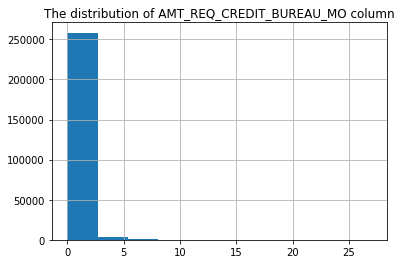

In [14]:
train_df.AMT_REQ_CREDIT_BUREAU_MON.hist()
plt.title("The distribution of AMT_REQ_CREDIT_BUREAU_MO column")
plt.show()

In [15]:
# train_df.AMT_REQ_CREDIT_BUREAU_MON.sort_values(ascending=False)

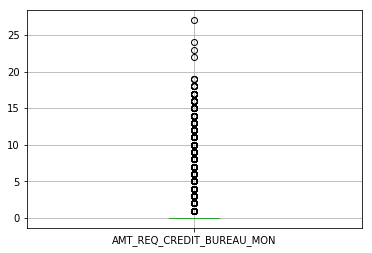

In [16]:
train_df.boxplot(['AMT_REQ_CREDIT_BUREAU_MON'])

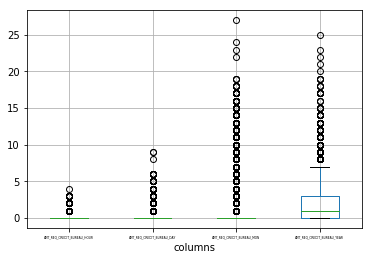

In [17]:
train_df.boxplot(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.xlabel('columns')
plt.xticks( fontsize = 3)
plt.show()


In [18]:
col_df= train_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']]
# all columns are NaN for the same people
#col_df[pd.isnull(col_df).any(axis=1)]

Number of enquiries to Credit Bureau about the client one hour before application is seen in AMT_REQ_CREDIT_BUREAU_hour and so on for the rest of the columns, they all can be reduced to one column for convinience and therefore  AMT_REQ_CREDIT_BUREAU_YEAR is selected and others are dropped.
The NaNs in the selected column are replaced by the Median

In [19]:
train_df.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT'], axis=1, inplace=True)

In [20]:
med=train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

In [21]:
train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(med, inplace=True)

In [22]:
check_df3= missing_values(train_df)
check_df3=check_df3[check_df3.no_NANs>0]
check_df3.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df3),\
      "\n The minimum percentage of NANs in a column:",check_df3.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df3.percentage_NANS.max())

The no. of columns with missing values now is:  51 
 The minimum percentage of NANs in a column: 19.78484948987131 
 The maximum percentage of NANs is: 69.9009296262121


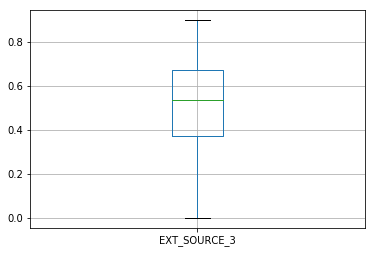

In [23]:
#EXT_SOURCE_3

train_df.boxplot(['EXT_SOURCE_3'])

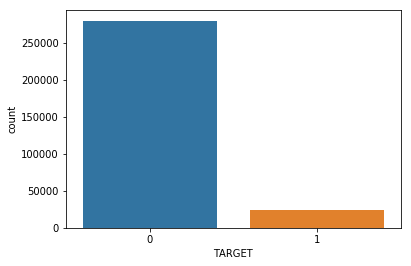

ratio of 1's to total: 0.08099996387888261


In [24]:
# RARE EVENT MODELLING
sns.countplot(train_df['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total:",len(train_df[train_df['TARGET']==1])/len(train_df['TARGET']))

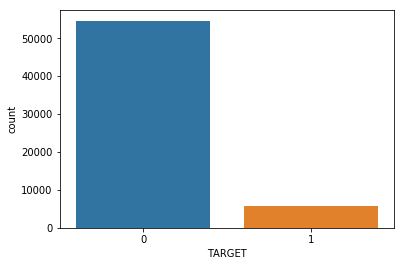

ratio of 1's to total: 0.09352541866525037


In [25]:
check_na_df= train_df[train_df['EXT_SOURCE_3'].isnull()==True]
sns.countplot(check_na_df['TARGET'],label="Count")
plt.show()

print("ratio of 1's to total:",len(check_na_df[check_na_df['TARGET']==1])/len(check_na_df['TARGET']))

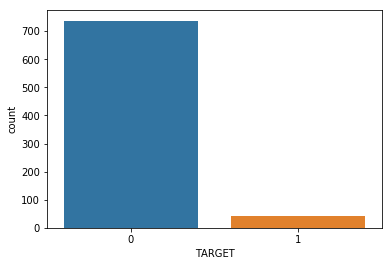

ratio of 1's to total: 0.05269922879177378


In [26]:
med_ext3= train_df['EXT_SOURCE_3'].median()

check_median_df= train_df[train_df['EXT_SOURCE_3']==med_ext3]
sns.countplot(check_median_df['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total:",len(check_median_df[check_median_df['TARGET']==1])/len(check_median_df['TARGET']))


In [27]:
train_df['EXT_SOURCE_3'].fillna(med_ext3, inplace=True)

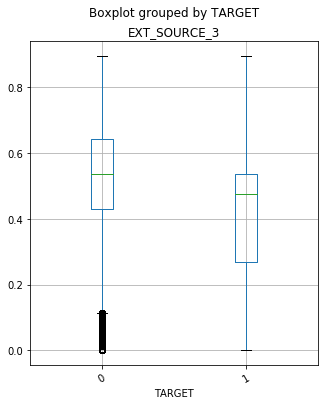

In [28]:
train_df.boxplot('EXT_SOURCE_3','TARGET',rot = 30,figsize=(5,6))

In [29]:
check_df4= missing_values(train_df)
check_df4=check_df4[check_df4.no_NANs>0]
check_df4.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df4),\
      "\n The minimum percentage of NANs in a column:",check_df4.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df4.percentage_NANS.max())

The no. of columns with missing values now is:  50 
 The minimum percentage of NANs in a column: 31.33835307407128 
 The maximum percentage of NANs is: 69.9009296262121


In [30]:
na_cols=check_df4.index.values.tolist()
# na_cols

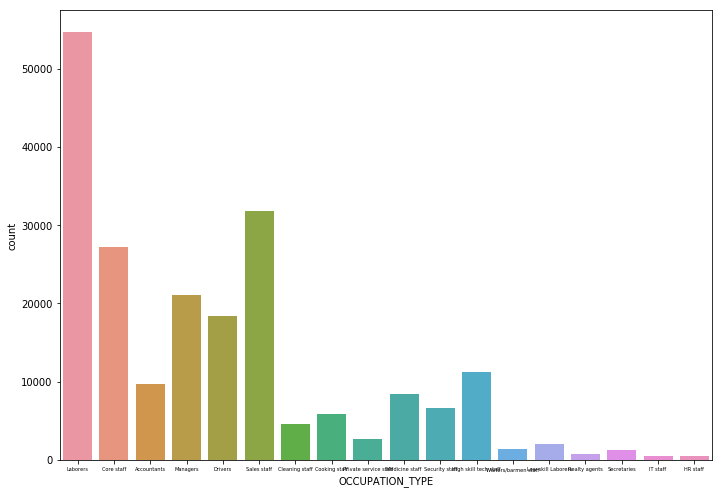

In [31]:
fig, ax = plt.subplots()
sns.countplot(train_df['OCCUPATION_TYPE'],label="Count")
fig.set_size_inches(11.7, 8.27)
plt.xticks( fontsize = 5)
plt.show()

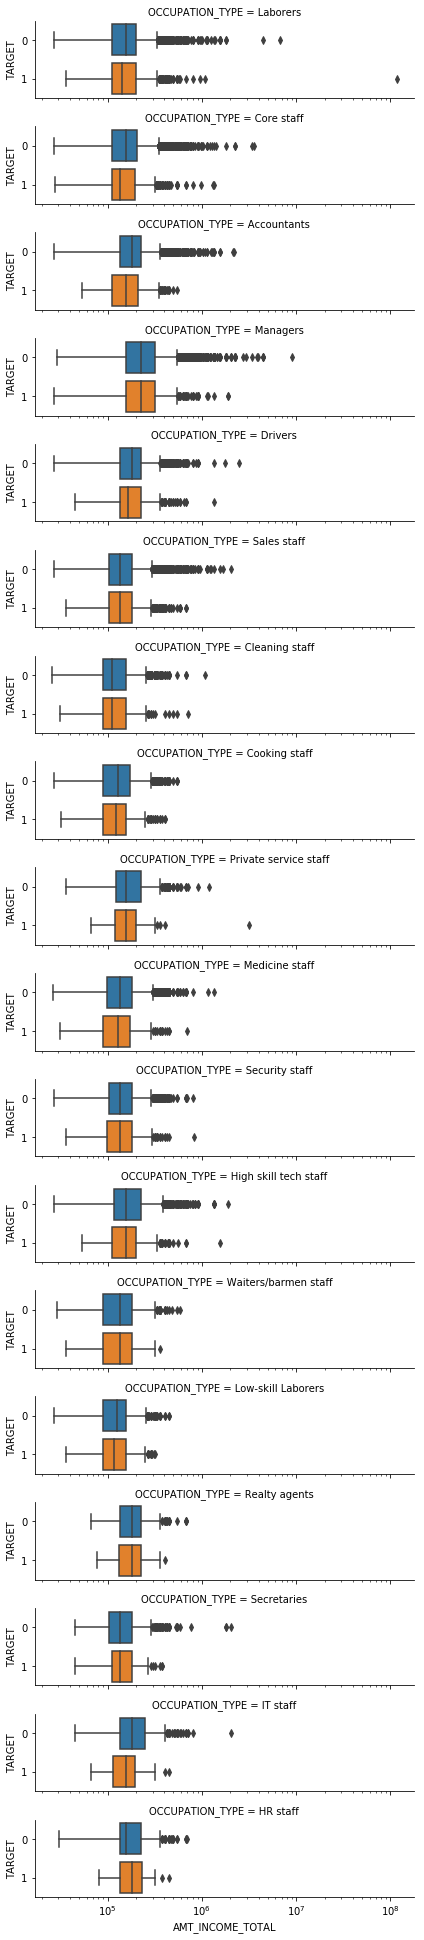

In [32]:
g = sns.catplot(x="AMT_INCOME_TOTAL", y="TARGET", row="OCCUPATION_TYPE",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train_df)

g.set(xscale="log")
plt.show()

In [33]:
df_1=train_df.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()
df_2=train_df.groupby('OCCUPATION_TYPE')['TARGET'].sum()
df_occup_tar = pd.concat([df_1,df_2], axis=1)
df_occup_tar.columns=['OCCUPATION_TYPE_total','TARGETis1']
sum_total=df_occup_tar.OCCUPATION_TYPE_total.sum()
df_occup_tar['Percentage_occ']= df_occup_tar.OCCUPATION_TYPE_total*100/sum_total
df_occup_tar['Percentage_default']= df_occup_tar.TARGETis1*100/df_occup_tar.OCCUPATION_TYPE_total
df_occup_tar
#df.groupby('a')['a'].transform('count')

,OCCUPATION_TYPE_total,TARGETis1,Percentage_occ,Percentage_default
OCCUPATION_TYPE,,,,
Accountants,9698,472,4.638061,4.866983
Cleaning staff,4615,445,2.207120,9.642470
Cooking staff,5898,620,2.820714,10.512038
Core staff,27263,1726,13.038509,6.330925
Drivers,18456,2098,8.826568,11.367577
HR staff,558,34,0.266863,6.093190
High skill tech staff,11261,696,5.385565,6.180623
IT staff,511,34,0.244385,6.653620
Laborers,54730,5806,26.174580,10.608441


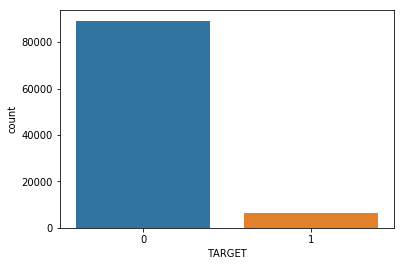

ratio of 1's to total len: 0.06534290354691676
6236 no. of instances
ratio of 1's when occ is null to total no. of 1s : 0.252807394494669


In [34]:
check_occupation_na= train_df[train_df.OCCUPATION_TYPE.isnull()==True ]
sns.countplot(check_occupation_na['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total len:",len(check_occupation_na[check_occupation_na['TARGET']==1])/len(check_occupation_na['TARGET']))
print(len(check_occupation_na[check_occupation_na['TARGET']==1]),"no. of instances")
print("ratio of 1's when occ is null to total no. of 1s :",\
      len(check_occupation_na[check_occupation_na['TARGET']==1])/len(train_df[train_df.TARGET==1]))

# Treating Missing Values of  OCCUPATION_TYPE

Thats a lot of data, lets replace the missing values by classifying them using the intuitive columns

In [35]:
# correlations = train_df.corr()['OCCUPATION_TYPE'].sort_values()

# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

train_df.columns #'CODE_GENDER','FLAG_OWN_CAR','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','DAYS_EMPLOYED',
#'FLAG_EMAIL','REGION_RATING_CLIENT'

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=117)

In [36]:
train_df_occ=train_df[['SK_ID_CURR','OCCUPATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_CONTRACT_TYPE',\
          'NAME_EDUCATION_TYPE','DAYS_EMPLOYED',\
          'FLAG_EMAIL','REGION_RATING_CLIENT']]

In [37]:
missing_values(train_df_occ) #all the columns are 

,no_NANs,percentage_NANS
SK_ID_CURR,0,0.000000
OCCUPATION_TYPE,95435,31.338353
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
DAYS_EMPLOYED,0,0.000000
FLAG_EMAIL,0,0.000000


In [38]:
test_df_occ=train_df_occ[train_df_occ['OCCUPATION_TYPE'].isnull()==True]
test_df_occ.fillna(0,inplace=True)

In [39]:
train_df_occ=train_df_occ[train_df_occ['OCCUPATION_TYPE'].isnull()==False]

Check for any outliers and treat them

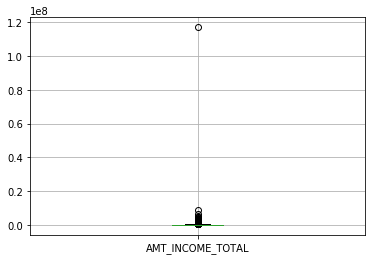

In [40]:
train_df_occ.boxplot('AMT_INCOME_TOTAL')

In [41]:
train_df_occ.AMT_INCOME_TOTAL.sort_values(ascending=False)[:10]
#we can see that top value is an outlier  removing the istance                                                  

12840     117000000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
287463      4500000.0
103006      4500000.0
187833      4500000.0
181698      3950059.5
20216       3825000.0
284311      3600000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
train_df_occ=train_df_occ[train_df_occ.AMT_INCOME_TOTAL!=117000000.0]

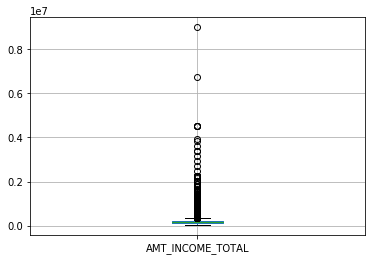

In [43]:
train_df_occ.boxplot('AMT_INCOME_TOTAL')

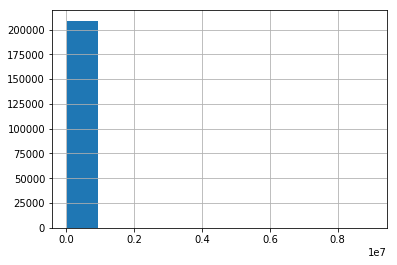

In [44]:
train_df_occ.AMT_INCOME_TOTAL.hist() # we'll still be needing to transform the column

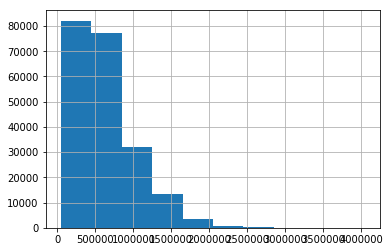

In [45]:
#AMT_CREDIT
train_df_occ.AMT_CREDIT.hist()

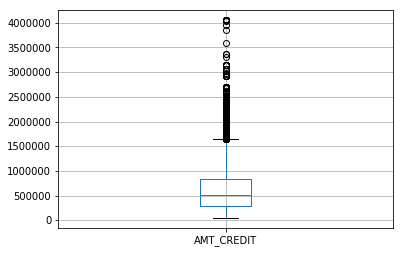

In [46]:
train_df_occ.boxplot('AMT_CREDIT')

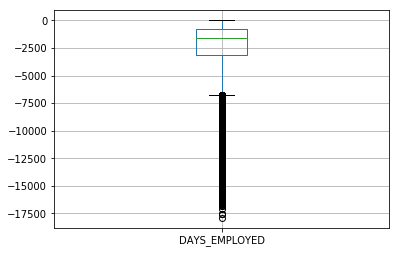

In [47]:
#DAYS_EMPLOYED
train_df_occ.boxplot('DAYS_EMPLOYED')

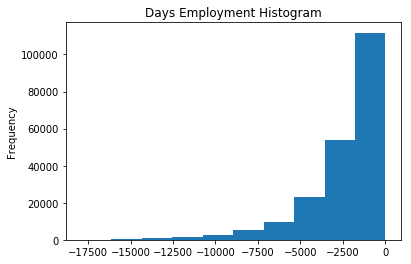

In [48]:
train_df_occ['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')

In [49]:
train_df_occ.DAYS_EMPLOYED.sort_values(ascending=True)[:15]

280994   -17912
273069   -17583
35191    -17531
234168   -17522
143265   -17139
296917   -16852
39095    -16849
249164   -16836
218832   -16767
164817   -16678
143266   -16651
241444   -16632
228384   -16607
297930   -16554
62757    -16538
Name: DAYS_EMPLOYED, dtype: int64

In [50]:
train_df_occ['YEARS_EMPLOYED']=train_df_occ.DAYS_EMPLOYED/-365
train_df_occ.YEARS_EMPLOYED.sort_values(ascending=False)[:15]

280994    49.073973
273069    48.172603
35191     48.030137
234168    48.005479
143265    46.956164
296917    46.169863
39095     46.161644
249164    46.126027
218832    45.936986
164817    45.693151
143266    45.619178
241444    45.567123
228384    45.498630
297930    45.353425
62757     45.309589
Name: YEARS_EMPLOYED, dtype: float64

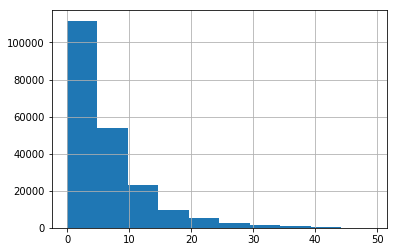

In [51]:
train_df_occ['YEARS_EMPLOYED'].hist()
plt.show()

In [52]:
train_df_occ.drop('DAYS_EMPLOYED',axis=1, inplace=True)

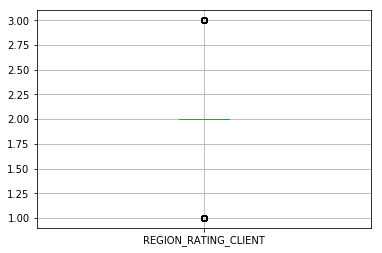

In [53]:
#REGION_RATING_CLIENT
train_df_occ.boxplot('REGION_RATING_CLIENT')
plt.show()

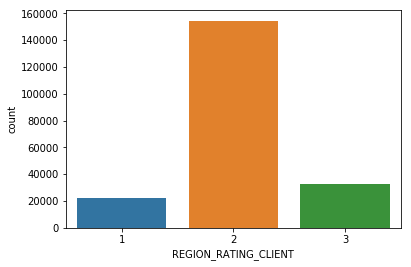

In [54]:
sns.countplot(train_df_occ['REGION_RATING_CLIENT'],label="Count")
plt.show()

Winsorizing  the two columns showing high outliers

In [55]:
def Winsorize_check(data):
    quantiles = data.quantile([0.05, 0.95])
    q_05 = quantiles.loc[0.05]
    q_95 = quantiles.loc[0.95]

    out = np.where(data.values <= q_05,q_05, np.where(data >= q_95, q_95, data))
    return out

In [56]:
colstotreat=['AMT_CREDIT','AMT_INCOME_TOTAL']
for i in colstotreat:
    train_df_occ[i]=Winsorize_check(train_df_occ[i])

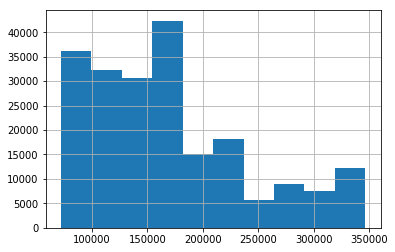

In [57]:
train_df_occ.AMT_INCOME_TOTAL.hist() 

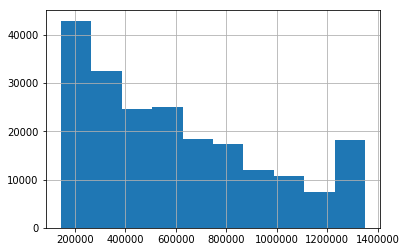

In [58]:
train_df_occ.AMT_CREDIT.hist() 

In [59]:
#'CODE_GENDER','FLAG_OWN_CAR','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE'
train_df_occ['FLAG_OWN_CAR_1']= np.where(train_df_occ['FLAG_OWN_CAR']=='N',0,1)
train_df_occ.drop(['FLAG_OWN_CAR'],axis=1,inplace=True)
train_df_occ['NAME_CONTRACT_TYPE_1']= np.where(train_df_occ['NAME_CONTRACT_TYPE']=='Cash loans',0,1)
train_df_occ.drop(['NAME_CONTRACT_TYPE'],axis=1,inplace=True)
train_df_occ.head(2)

,SK_ID_CURR,OCCUPATION_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,FLAG_EMAIL,REGION_RATING_CLIENT,YEARS_EMPLOYED,FLAG_OWN_CAR_1,NAME_CONTRACT_TYPE_1
0,100002,Laborers,M,202500.0,406597.5,Secondary / secondary special,0,2,1.745205,0,0
1,100003,Core staff,F,270000.0,1293502.5,Higher education,0,1,3.254795,0,0


In [60]:
def getdummies(df):
    t1=df.select_dtypes(include='object')
    t1dummies=pd.get_dummies(t1)
    return t1dummies

In [61]:
#CODE_GENDER and NAME_EDUCATION_TYPE dummy variables are added for both

dummies_df= train_df_occ[['CODE_GENDER','NAME_EDUCATION_TYPE']]
dummies_df=getdummies(dummies_df)
dummies_df.head(3)

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1


In [62]:
train_df_occ.drop(['CODE_GENDER','NAME_EDUCATION_TYPE'],axis=1,inplace=True)
train_df_occ1=pd.concat([train_df_occ, dummies_df], axis=1, sort=False)
train_df_occ1.head(3)

,SK_ID_CURR,OCCUPATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,FLAG_EMAIL,REGION_RATING_CLIENT,YEARS_EMPLOYED,FLAG_OWN_CAR_1,NAME_CONTRACT_TYPE_1,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,100002,Laborers,202500.0,406597.5,0,2,1.745205,0,0,0,1,0,0,0,0,0,1
1,100003,Core staff,270000.0,1293502.5,0,1,3.254795,0,0,1,0,0,0,1,0,0,0
2,100004,Laborers,72000.0,143910.0,0,2,0.616438,1,1,0,1,0,0,0,0,0,1


In [63]:
#making all vars standardized
#AMT_INCOME_TOTAL	AMT_CREDIT REGION_RATING_CLIENT	YEARS_EMPLOYED
scaler = preprocessing.StandardScaler()
a= scaler.fit_transform(train_df_occ[['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_RATING_CLIENT','YEARS_EMPLOYED']])
scaled_df = pd.DataFrame(a, columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_RATING_CLIENT','YEARS_EMPLOYED'])


In [64]:
train_df_occ1.drop(['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_RATING_CLIENT','YEARS_EMPLOYED'],axis=1,inplace=True)

train_df_occ1['AMT_INCOME_TOTAL']= scaled_df['AMT_INCOME_TOTAL'].tolist()
train_df_occ1['AMT_CREDIT']= scaled_df['AMT_CREDIT'].tolist()
train_df_occ1['REGION_RATING_CLIENT']= scaled_df['REGION_RATING_CLIENT'].tolist()
train_df_occ1['YEARS_EMPLOYED']= scaled_df['YEARS_EMPLOYED'].tolist()
train_df_occ1.head(5)

,SK_ID_CURR,OCCUPATION_TYPE,FLAG_EMAIL,FLAG_OWN_CAR_1,NAME_CONTRACT_TYPE_1,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_RATING_CLIENT,YEARS_EMPLOYED
0,100002,Laborers,0,0,0,0,1,0,0,0,0,0,1,0.447788,-0.529721,-0.098914,-0.746129
1,100003,Core staff,0,0,0,1,0,0,0,1,0,0,0,1.367392,1.952526,-2.063813,-0.510197
2,100004,Laborers,0,1,1,0,1,0,0,0,0,0,1,-1.330114,-1.264924,-0.098914,-0.922544
3,100006,Laborers,0,0,0,1,0,0,0,0,0,0,1,-0.471817,-0.792568,-0.098914,0.282382
4,100007,Core staff,0,0,0,0,1,0,0,0,0,0,1,-0.655737,-0.231924,-0.098914,0.281954


In [65]:


X= train_df_occ1.iloc[:,2:]
y= train_df_occ1.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

In [66]:
accuracy

0.33502314726250143

In [67]:

clf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,)

In [68]:
np.unique(y)

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)

In [69]:
y=train_df_occ1.iloc[:,1].map({'Accountants': 1, 'Cleaning staff': 2, 'Cooking staff':3,'Core staff': 4, 'Drivers':5,\
      'HR staff':6, 'High skill tech staff':7, 'IT staff':8,\
       'Laborers':9, 'Low-skill Laborers':10, 'Managers':11, 'Medicine staff':12,\
       'Private service staff':13, 'Realty agents':14, 'Sales staff':15,\
       'Secretaries':16, 'Security staff':17, 'Waiters/barmen staff':18})

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    pred_train=clf.predict( X.iloc[train])
    pred_test=clf.predict( X.iloc[test])
    acc_score_train = metrics.accuracy_score(y.iloc[train],pred_train )
    acc_score = metrics.accuracy_score(y.iloc[test],pred_test)
    scores.append((acc_score_train, acc_score))

In [71]:
pd.DataFrame(scores, columns=['ACC Train', 'ACC Test'])

,ACC Train,ACC Test
0,0.342986,0.340052
1,0.342556,0.341176
2,0.342855,0.342563
3,0.341930,0.343680
4,0.342179,0.341154


In [72]:
clf2 = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10)

In [73]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
scores = []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf2.fit(X.iloc[train], y.iloc[train])
    pred_train=clf2.predict( X.iloc[train])
    pred_test=clf2.predict( X.iloc[test])
    acc_score_train = metrics.accuracy_score(y.iloc[train],pred_train )
    acc_score = metrics.accuracy_score(y.iloc[test],pred_test)
    scores.append((acc_score_train, acc_score))

In [74]:
pd.DataFrame(scores, columns=['ACC Train', 'ACC Test'])

,ACC Train,ACC Test
0,0.358046,0.343542
1,0.357161,0.343328
2,0.357286,0.343161
3,0.357084,0.345713
4,0.357153,0.344503


In [75]:
features_df= pd.DataFrame(columns=['col','importance'])

features_df.col= X.columns.tolist()

features_df.importance=  clf2.feature_importances_

In [76]:
features_df.sort_values('importance',ascending=False,inplace=True)

In [77]:
imp_df= features_df[:5]

imp_df.importance.sum()

impcol=imp_df.col.tolist()

In [78]:
newX= X[impcol]

In [79]:
newX.columns

Index(['CODE_GENDER_M', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'AMT_INCOME_TOTAL'],
      dtype='object')

In [81]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
scores = []

for (train, test), i in zip(cv.split(newX, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    pred_train=clf.predict( X.iloc[train])
    pred_test=clf.predict( X.iloc[test])
    acc_score_train = metrics.accuracy_score(y.iloc[train],pred_train )
    acc_score = metrics.accuracy_score(y.iloc[test],pred_test)
    scores.append((acc_score_train, acc_score))

In [82]:
pd.DataFrame(scores, columns=['ACC Train', 'ACC Test'])

,ACC Train,ACC Test
0,0.342849,0.340099
1,0.343016,0.342132
2,0.343159,0.342324
3,0.341404,0.343035
4,0.342986,0.342302
